In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)
%matplotlib inline

reloaded
reloaded
reloaded


8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08
8.5e-08


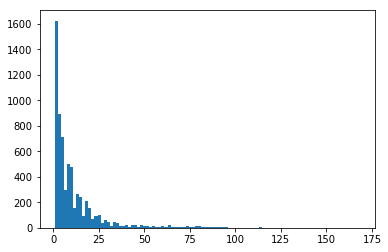

In [68]:
lt4_string = '111no2_SIL2_EntangleOnDemandInclCR'
lt3_string = 'in_SIL3_EntangleOnDemandInclCR'
fs = tb.latest_data(contains = lt4_string,newer_than='20170404_000000',return_all=True)
diffs = []
for f in fs:
    a = mbi.MBIAnalysis(f)
    agrp = a.adwingrp('adwindata')
    invs = agrp['invalid_data_markers'].value
    if agrp.attrs['yellow_repump_amplitude']!= 8.5e-8: ### only select one power for yellow!
        continue
    diffs.extend(np.diff(invs)[np.diff(invs)!=0])

hist,bins,patches = plt.hist(diffs,100)
x = bins[1:]-(bins[1]-bins[0])/2.
x = x*0.300 #convert to ms


Converged with chi squared  127279.016862
degrees of freedom, dof  24
RMS of residuals (i.e. sqrt(chisq/dof))  72.8237074671
Reduced chisq (i.e. variance of residuals)  5303.29236925

fitted parameters at minimum, with 68% C.I.:
 0 A           1258.650036 +/- 126.951970
 1 tau            2.447211 +/-   0.254369

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.859597  1.000000



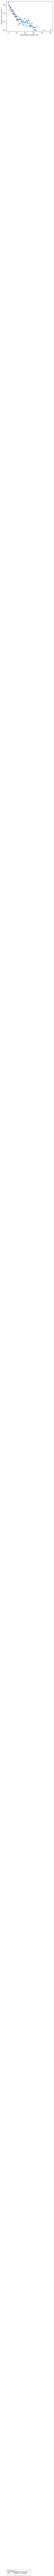

In [69]:
fig,ax = plt.subplots()
plt.plot(x,hist,'o')
fitres = fit.fit1d(x[x<14][1:],hist[x<14][1:],common.fit_exp_decay_with_offset,1,1000,2,do_print=True,fixed=[0])
plot.plot_fit1d(fitres,plot_data=False,ax=ax)
ax.set_yscale("log", nonposy='clip')
plt.xlabel('Deionization duration (ms)')
plt.ylabel('Number of occurences')
